In [1]:
from numba_code import *
import matplotlib.pyplot as plt
plt.style.use('default')

## Test 2, K=100, all mutant leaf, s=0.001

In [3]:
#Initial state for the star
in_numbers=np.array([[0.,100.],[100.,0.],[0.,100.],[0.,100.]]).astype(np.int64)
    
#Parameters
m=0.05
mO=m/2
mI=3*mO
s=0.001
fitnesses=np.array([1+s,1])
nb_cycles=1500
t=np.log(100)
N_demes=4
K=100
folder='Test2/Star'

In [4]:
#Migration matrix of the star
migration_matrix=define_star(N_demes,mI,mO, equal_contribution=True)

In [5]:
#Fixation probability 
nb_sim=1000
et, ft, fp = fixation_probability(in_numbers, folder, migration_matrix, fitnesses, nb_sim, nb_cycles, t, K, size_follow_numbers=1500, print_frequency=1, save_dynamics=True)
print(f'Fixation probability on {nb_sim} simulations is {fp}, with \n average extinction time {et} and \n average fixation time {ft}')

Fixation probability on 1000 simulations is 0.66, with 
 average extinction time 347.7 and 
 average fixation time 578.2212121212121


In [6]:
folder='Test2/Wm'

#Migration matrix of the clique
migration_matrix=define_clique(N_demes,m)

In [7]:
#Fixation probability 
et, ft, fp = fixation_probability(in_numbers, folder, migration_matrix, fitnesses, nb_sim, nb_cycles, t, K, size_follow_numbers=1500, print_frequency=1, save_dynamics=True)
print(f'Fixation probability on {nb_sim} simulations is {fp}, with \n average extinction time {et} and \n average fixation time {ft}')

Fixation probability on 1000 simulations is 0.611, with 
 average extinction time 286.7969151670951 and 
 average fixation time 574.9754500818331


### Trajectories

In [8]:
def ratios(fix, x, deme):
    
    #Number of mutants in deme in the first x steps of the dynamics
    deme_mutant=fix[:x,deme,0]

    #Number of wild-types in deme in the first x steps of the dynamics
    deme_WT=fix[:x,deme,1]

    #Ratio of mutant in deme in the first x steps of the dynamics
    #deme_ratioM=deme_mutant/(deme_WT+deme_mutant)
    
    return deme_mutant, deme_WT


def extract_fix(path, x, deme,n):
    
    deme_dynamics = []
    
    for i in range(n):
        path_sub = path + '/fix_' + str(i+1) + '.npz'
        fix = np.load(path_sub)['arr_0']
        deme_dynamics.append(ratios(fix,x,deme))
    
    return mean(deme_dynamics,x,n)

def extract_ex(path, x, deme,n):
    
    deme_dynamics = []
    
    for i in range(n):
        path_sub = path + '/ex_' + str(i) + '.npz'
        fix = np.load(path_sub)['arr_0']
        deme_dynamics.append(ratios(fix,x,deme))
    
    return mean(deme_dynamics,x,n)

def extracts_ex(path,x,n):
    return extract_ex(path,x,0,n),extract_ex(path,x,1,n),extract_ex(path,x,2,n),extract_ex(path,x,3,n)

def extracts_fix(path,x,n):
    return extract_fix(path,x,0,n),extract_fix(path,x,1,n),extract_fix(path,x,2,n),extract_fix(path,x,3,n)

def mean(val,x,n):
    
    mutant = np.zeros(x)
    wt = np.zeros(x)
    
    for i in range(n):
        mutant += val[i][0]
        wt += val[i][1]
        
    return mutant/(wt+mutant)

In [10]:
x=1500
star_fix_center, star_fix_1, star_fix_2, star_fix_3 = extracts_fix("Test2/Star",x,660)
star_ex_center, star_ex_1, star_ex_2, star_ex_3 = extracts_ex("Test2/Star",x,nb_sim-660)

In [11]:
x=1500
wm_fix_center, wm_fix_1, wm_fix_2, wm_fix_3 = extracts_fix("Test2/Wm",x,611)
wm_ex_center, wm_ex_1, wm_ex_2, wm_ex_3 = extracts_ex("Test2/Wm",x,nb_sim-611)

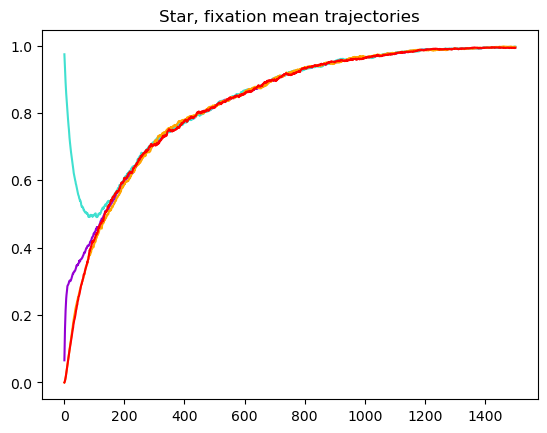

In [12]:
center = 'darkviolet'
leaf1 = 'turquoise'
leaf2 = 'orange'
leaf3 = 'red'

def trajectories(arr1,arr2,arr3,arr4,title):
    plt.plot(np.arange(1,x+1,1),arr1,color=center)
    plt.plot(np.arange(1,x+1,1),arr2,color=leaf1)
    plt.plot(np.arange(1,x+1,1),arr3,color=leaf2)
    plt.plot(np.arange(1,x+1,1),arr4,color=leaf3)
    plt.title(title)
    plt.show()
    
trajectories(star_fix_center,star_fix_1,star_fix_2,star_fix_3,'Star, fixation mean trajectories')

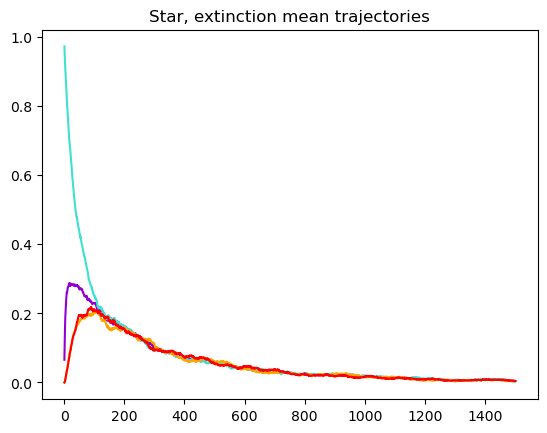

In [13]:
trajectories(star_ex_center,star_ex_1,star_ex_2,star_ex_3,'Star, extinction mean trajectories')

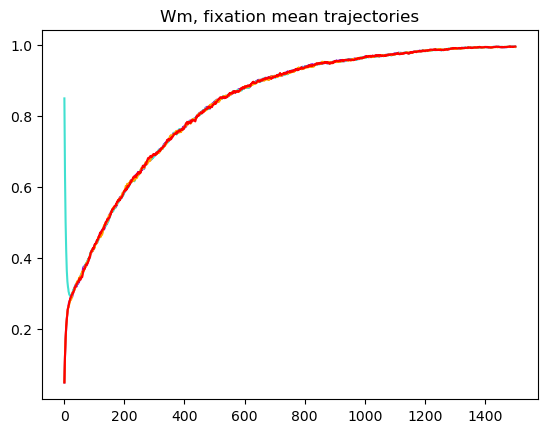

In [14]:
trajectories(wm_fix_center,wm_fix_1,wm_fix_2,wm_fix_3,'Wm, fixation mean trajectories')

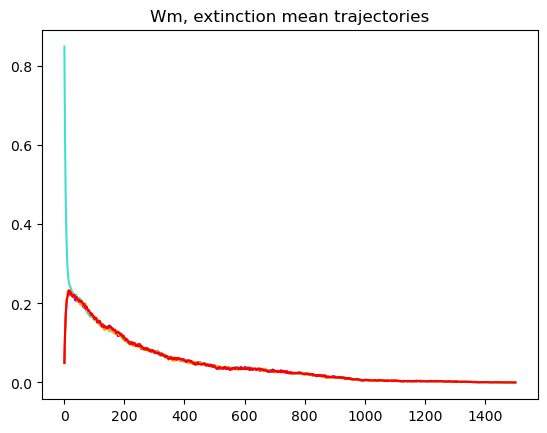

In [15]:
trajectories(wm_ex_center,wm_ex_1,wm_ex_2,wm_ex_3,'Wm, extinction mean trajectories')

# Test 3, same as Test 2 but with only one mutant

In [16]:
#Initial state for the star
in_numbers=np.array([[0.,100.],[1.,99.],[0.,100.],[0.,100.]]).astype(np.int64)
    
folder_star='Test3/Star'

In [4]:
#Migration matrix of the star
migration_matrix=define_star(N_demes,mI,mO, equal_contribution=True)

In [5]:
#Fixation probability 
nb_sim=10000
et, ft, fp = fixation_probability(in_numbers, folder_star, migration_matrix, fitnesses, nb_sim, nb_cycles, t, K, size_follow_numbers=1500, print_frequency=1, save_dynamics=True)
print(f'Fixation probability on {nb_sim} simulations is {fp}, with \n average extinction time {et} and \n average fixation time {ft}')

Fixation probability on 10000 simulations is 0.0078, with 
 average extinction time 10.205402136665995 and 
 average fixation time 679.3974358974359


In [17]:
folder_wm='Test3/Wm'

#Migration matrix of the clique
migration_matrix=define_clique(N_demes,m)

In [7]:
#Fixation probability 
et, ft, fp = fixation_probability(in_numbers, folder_wm, migration_matrix, fitnesses, nb_sim, nb_cycles, t, K, size_follow_numbers=1500, print_frequency=1, save_dynamics=True)
print(f'Fixation probability on {nb_sim} simulations is {fp}, with \n average extinction time {et} and \n average fixation time {ft}')

Fixation probability on 10000 simulations is 0.0082, with 
 average extinction time 8.125730994152047 and 
 average fixation time 608.5975609756098


In [18]:
x=1500
star_fix_center, star_fix_1, star_fix_2, star_fix_3 = extracts_fix(folder_star,x,78)
star_ex_center, star_ex_1, star_ex_2, star_ex_3 = extracts_ex(folder_star,x,nb_sim-78)
wm_fix_center, wm_fix_1, wm_fix_2, wm_fix_3 = extracts_fix(folder_wm,x,82)
wm_ex_center, wm_ex_1, wm_ex_2, wm_ex_3 = extracts_ex(folder_wm,x,nb_sim-82)

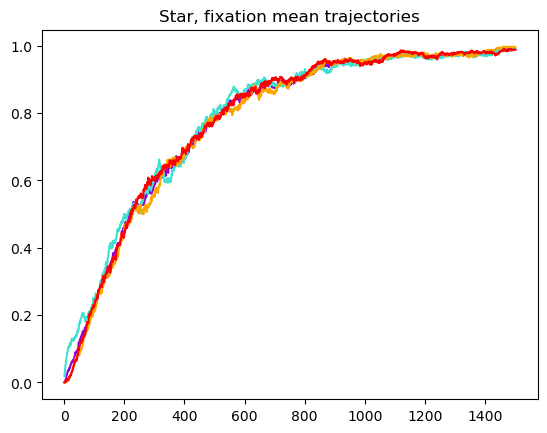

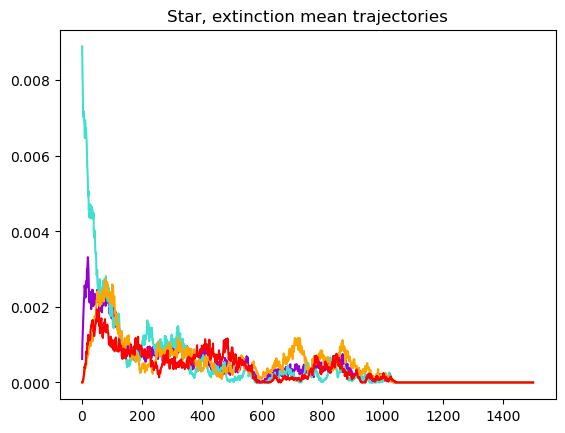

In [19]:
trajectories(star_fix_center,star_fix_1,star_fix_2,star_fix_3,'Star, fixation mean trajectories')
trajectories(star_ex_center,star_ex_1,star_ex_2,star_ex_3,'Star, extinction mean trajectories')

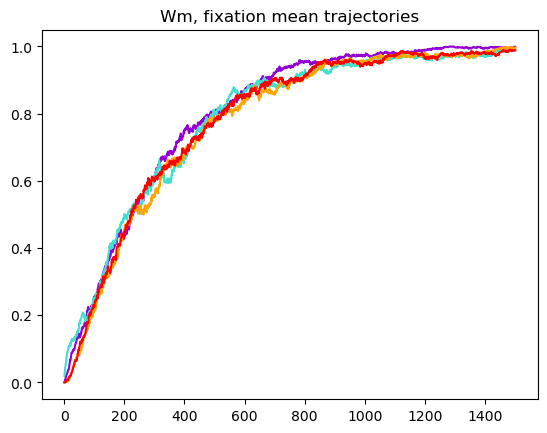

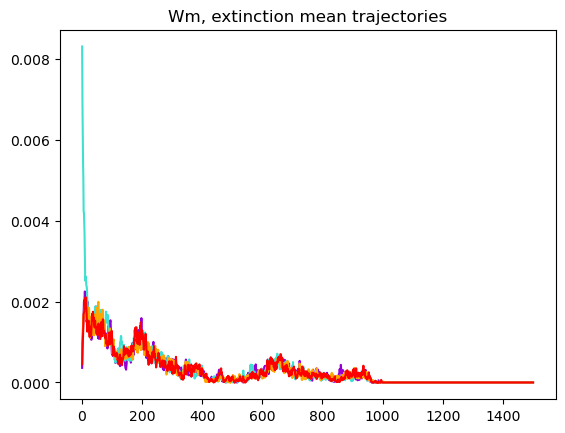

In [20]:
trajectories(wm_fix_center,star_fix_1,star_fix_2,star_fix_3,'Wm, fixation mean trajectories')
trajectories(wm_ex_center,wm_ex_1,wm_ex_2,wm_ex_3,'Wm, extinction mean trajectories')